In [1]:
import geopandas as gpd
import rasterio as rio
from rasterio import mask
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
path_sam_water = "E:/YNU/5/OpenSourceGIS/Act_7/OnClass/训练样本/water.gpkg"
path_sam_land = "E:/YNU/5/OpenSourceGIS/Act_7/OnClass/训练样本/land.gpkg"
path_rsimg = "E:/YNU/5/OpenSourceGIS/Act_7/OnClass/chenggong_utm48.tif"

In [3]:
sam_water = gpd.read_file(path_sam_water)
sam_land = gpd.read_file(path_sam_land)
print(sam_land.shape)
print(sam_water.shape)

(29, 2)
(16, 1)


In [4]:
rsimg_rio = rio.open(path_rsimg)
rsimg_rio.meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': 0.0,
 'width': 2875,
 'height': 3379,
 'count': 6,
 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 48N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",105],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32648"]]'),
 'transform': Affine(10.421454790528236, 0.0, 268167.02525260474,
        0.0, -9.543567381150961, 2765453.1872716597)}

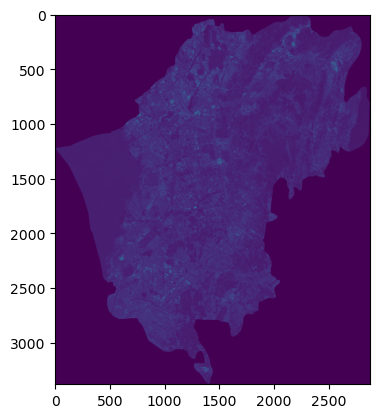

In [5]:
plt.imshow(rsimg_rio.read(1))

In [6]:
masked_img_water, transform_masked_img_water = mask.mask(
    rsimg_rio,
    sam_water.geometry,
    crop=True,
    nodata=0)


masked_img_land, transform_masked_img_land = mask.mask(
    rsimg_rio,
    sam_land.geometry,
    crop=True,
    nodata=0)

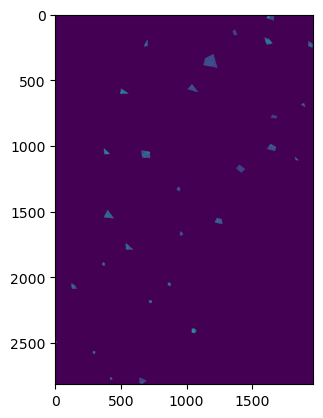

In [7]:
plt.imshow(masked_img_land[0])

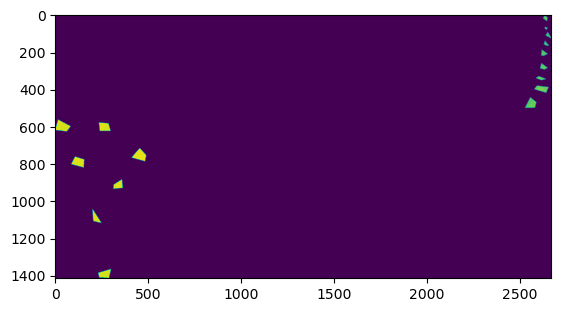

In [8]:
plt.imshow(masked_img_water[0])

In [9]:
ids_water = np.where (masked_img_water[0] != 0)
fea_water = masked_img_water[:, ids_water[0], ids_water[1]]
print(fea_water.shape)

(6, 23612)


In [10]:
ids_land = np.where (masked_img_land[0] != 0)
fea_land = masked_img_land[:, ids_land[0], ids_land[1]]
print(fea_land.shape)

(6, 38494)


In [11]:
feas = np.concatenate([fea_water, fea_land], axis = 1)
feas_ = feas.transpose(1,0)
feas_.shape

(62106, 6)

In [12]:
label_water = np.full(shape = fea_water.shape[1], fill_value = 0)
label_land = np.full(shape = fea_land.shape[1], fill_value = 1)

In [13]:
label_water

array([0, 0, 0, ..., 0, 0, 0])

In [14]:
label_land

array([1, 1, 1, ..., 1, 1, 1])

In [18]:
labels = np.concatenate([label_water, label_land])
labels = labels[:, np.newaxis]
labels.shape

(62106, 1)

In [ ]:
sams = np.concatenate([feas_, labels], axis=1)
sams.shape
sams

array([[1275, 1330, 1366, ...,  231,  878,    0],
       [1274, 1335, 1343, ...,  231,  878,    0],
       [1272, 1340, 1346, ...,  231,  878,    0],
       ...,
       [1679, 1641, 1408, ...,  216,  809,    1],
       [1570, 1594, 1406, ...,  216,  809,    1],
       [1708, 1674, 1460, ...,  216,  809,    1]])

In [ ]:
np.save('E:/YNU/5/OpenSourceGIS/Act_7/OnClass/sams_array.npy', sams)